In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
Games = pd.read_csv(r"C:/Users/bbsj4/Desktop/Data Analyst Cert Treehouse/UNIT_6/Project6/top100videogamesales.csv")

In [3]:
Games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [4]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Name          100 non-null    object 
 2   Platform      100 non-null    object 
 3   Year          100 non-null    int64  
 4   Genre         100 non-null    object 
 5   Publisher     100 non-null    object 
 6   NA_Sales      100 non-null    float64
 7   EU_Sales      100 non-null    float64
 8   JP_Sales      100 non-null    float64
 9   Other_Sales   100 non-null    float64
 10  Global_Sales  100 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


Question 1:
Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

To complete this question: I had to get the total sales by region for each publisher, assign colors to create the stacked visual representation. Clearly, Nintendo has far more overall sales than any other publisher. In fact, it appears that the sales in North America for Nintendo are more than the total sales for any other publisher. 


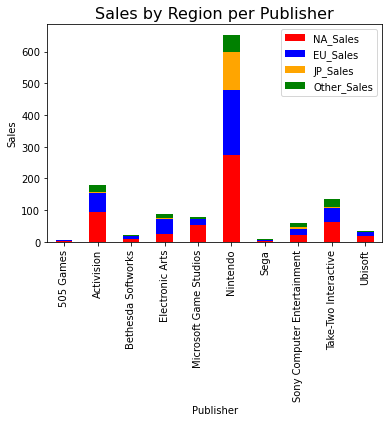

In [7]:
sales_by_region = Games[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

publishers = Games['Publisher']
North_America = Games['NA_Sales']
Europe = Games['EU_Sales']
Japan = Games['JP_Sales']
Other = Games['Other_Sales']

x = sales_by_region.groupby(['Publisher']).sum()
x_ind=x.reset_index()
x_ind.set_index('Publisher').plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'green'])

plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title('Sales by Region per Publisher', fontsize=16)
plt.show()



Question 2:
Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Examine the global sales by year, we see that year to year sales have been highly variable. There was a nice increase in sales from 2003 to 2006, reaching the highest total sales year. Then, total sales took a dip in 2007, followed by another increase 2007 to 2009. From 2009-2014 there has been a general decline in sales. 


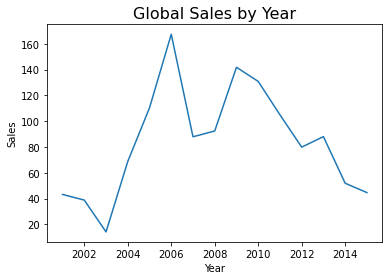

In [8]:
sales_by_year = Games[['Year','Global_Sales']]
sales_by_year = sales_by_year.groupby(['Year']).sum().reset_index()
sns.lineplot(data=sales_by_year,x='Year',y='Global_Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Global Sales by Year', fontsize=16)
plt.show()


Question 3: 3	Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. 

Most Action games sell in the range of over 6 dollars and under 10 dollars, globally. The second most common cost of Action games, globally, is in the slightly under 10 dollars to slightly over 12 dollar range. Overall, the distribution of costs for Action games, globally is between 6 dollars and 22 dollars. 

Text(0.5, 0, 'Global Categories of Sales')

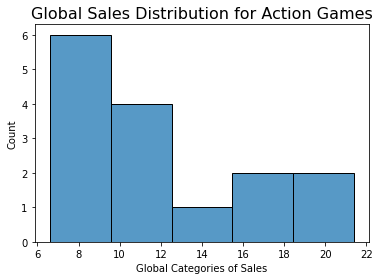

In [12]:
action = Games.loc[Games['Genre']=='Action']

sns.histplot(data=action, x = 'Global_Sales')
plt.xlabel('Global Categories of Sales')
plt.title('Global Sales Distribution for Action Games', fontsize=16)


Question 4: North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

See overiew of North America and European analysis, along with comparison in the markdown below the European Sales by Genre pie chart. 

In [21]:
North_America = Games[['Genre','NA_Sales']]
North_America= North_America.groupby(['Genre']).sum().reset_index().sort_values(by='NA_Sales',ascending=False)
Best_genres = North_America[:7]
Other = North_America[:6:-1]
Other_combined = Other['NA_Sales'].sum()

Best_genres.loc[-1] = ['Other', Other_combined]  
Best_genres.index = Best_genres.index + 1  
Best_genres, Other


C:\Users\bbsj4\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


(           Genre  NA_Sales
 8        Shooter    140.44
 10        Sports     84.87
 1         Action     77.81
 3           Misc     70.60
 6         Racing     56.45
 4       Platform     52.67
 7   Role-Playing     50.48
 0          Other     32.45,
         Genre  NA_Sales
 4      Puzzle      3.44
 1    Fighting     14.40
 8  Simulation     14.61)

Text(0, 0.5, '')

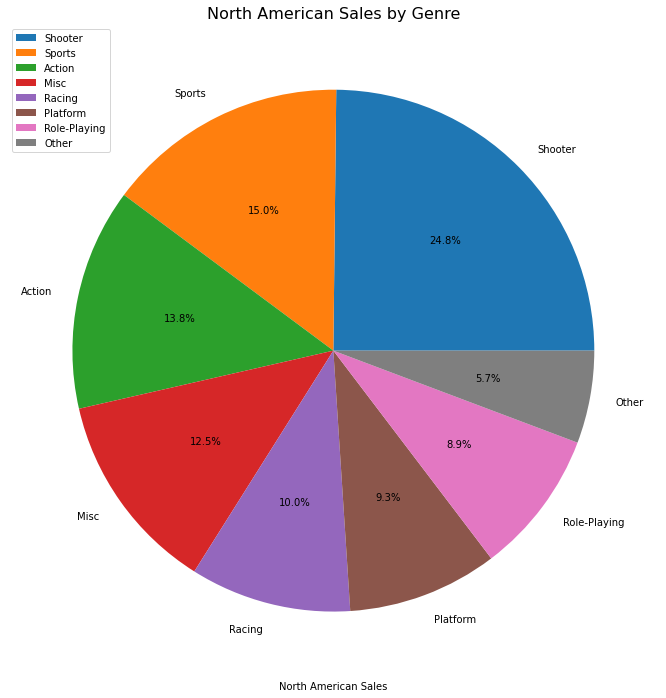

In [22]:
labels = Best_genres['Genre']
Best_genres.plot.pie(y='NA_Sales',autopct="%.1f%%", labels = labels,figsize=(12, 12))
plt.title('North American Sales by Genre', fontsize=16)
plt.xlabel('North American Sales')
plt.ylabel('')


Question 5:	European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

In [12]:
European = Games[['Genre','EU_Sales']]
European = European.groupby(['Genre']).sum().reset_index().sort_values(by='EU_Sales',ascending=False)
Best_genres = European[:7]
Other = European[:6:-1]
Other_combined = Other['EU_Sales'].sum()

Best_genres.loc[-1] = ['Other', Other_combined]  
Best_genres.index = Best_genres.index + 1  
Best_genres, Other

C:\Users\bbsj4\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


(           Genre  EU_Sales
 10        Sports     82.18
 8        Shooter     81.63
 1         Action     58.15
 3           Misc     48.00
 6         Racing     44.03
 7   Role-Playing     36.20
 4       Platform     33.12
 0          Other     33.62,
         Genre  EU_Sales
 1    Fighting      5.00
 4      Puzzle      5.36
 8  Simulation     23.26)

Text(0, 0.5, '')

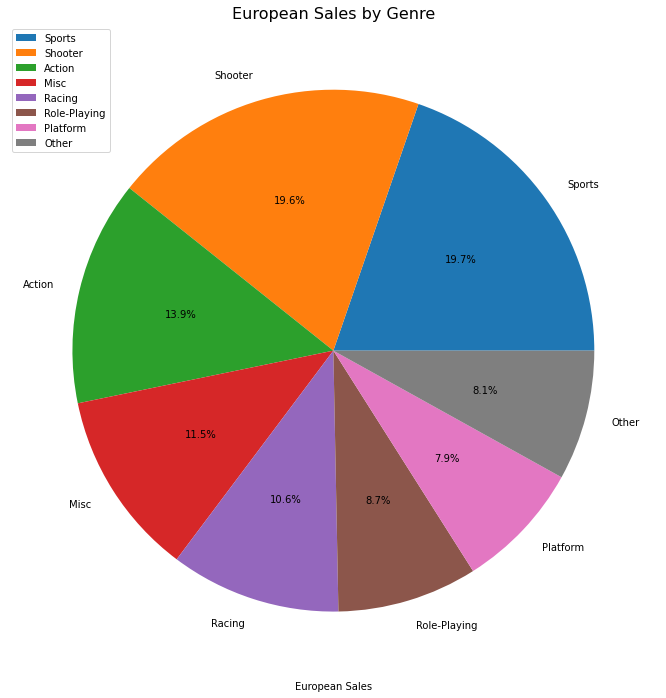

In [13]:
labels = Best_genres['Genre']
Best_genres.plot.pie(y='EU_Sales',autopct="%.1f%%", labels = labels,figsize=(12, 12))
plt.title('European Sales by Genre', fontsize=16)
plt.xlabel('European Sales')
plt.ylabel('')

Question 6:	Explain differences and similarities between the North American and European charts in markdown.

Explanation for 4-6: In both North America and European markets, the leading sales by genre include: shooter, sports, and action. However, in North America, the sales of shooter style games is the greatest, totally almost the combined figure of the other two categories. Whereas, in Europe, Sports and Shooter sales take the lead, and are almost the same amount of sales (Sports edging out Shooter by a very small margin). In both markets, the lowest three genres include puzzles, simulation, and fighting- which were combined in both charts to represent the 'other' category. I elected to only include three genres in the other category because if other represented too many lesser sales, the pictoral representation would not tell an accurate story (because other would look large). In both markets the following categories: Misc., Racing, Role-Play, and Platform represent the mid-level sales. 

Question 7:	Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. 

For this question, I first created the pivot to table to get the count for each platform. Then, I took the data and used it to create a bar graph. Nintendo accounts for the largest number of games sold (n=46), followed by PlayStation (n=34). In the third position for amount sold by platform is XBox (n=19) and only a trivial amount in the other category (n=1). 

In [26]:
games_by_platform = Games['Platform'].value_counts()
games_by_platform


Nintendo       46
PlayStation    34
XBox           19
Other           1
Name: Platform, dtype: int64

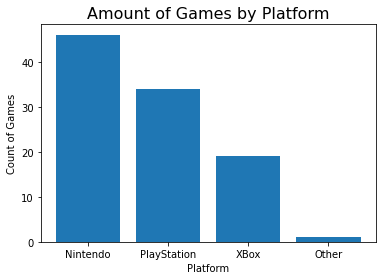

In [32]:
counts = [46, 34, 19, 1]
Platforms = ['Nintendo', 'PlayStation', 'XBox', 'Other']
plt.bar(Platforms, counts)

plt.xlabel('Platform')
plt.ylabel('Count of Games')
plt.title('Amount of Games by Platform', fontsize=16)

plt.show()